In [15]:
!git clone https://github.com/ndb796/korean_face_age_dataset custom_korean_family_dataset_resolution_128

Cloning into 'custom_korean_family_dataset_resolution_128'...
remote: Enumerating objects: 27577, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 27577 (delta 0), reused 6 (delta 0), pack-reused 27571
Receiving objects: 100% (27577/27577), 76.04 MiB | 10.39 MiB/s, done.
Updating files: 100% (53072/53072), done.


In [5]:
import torch
import torchvision
import torchvision.transforms as transforms
import torchvision.models as models

import torch.optim as optim
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import Dataset

import matplotlib.pyplot as plt
import matplotlib.image as image
import numpy as np
import pandas as pd
from PIL import Image
import os

In [33]:
# check dataset
# training dataset : 10025
# validation dataset : 1539
# test dataset : 1504

"""
> [Function] Parse the metadata
* image_age_list[0] = ["F00001_AGE_D_!*_a1.jpg"] = "a"
"""

def parsing(meta_data):
    image_age_list = []
    #iterate all rows in the metadata file
    for idx, row in meta_data.iterrows():
        image_path = row['image_path'] # ex F0001_AGE_D_18_b2.jpg, F0001_AGE_D_18_c1.jpg
        #print(row['image_path'])
        age_class = row['age_class'] # ex : a, b, c, d ...etc
        #print(row['age_class'])
        image_age_list.append([image_path, age_class])
        
    return image_age_list

In [34]:
class Dataset(Dataset):
    def __init__(self, meta_data, image_directory, transform = None):
        self.meta_data = meta_data
        self.image_directory = image_directory
        self.transform = transform
        
        #process the meta data
        image_age_list = parsing(meta_data)
        
        self.image_age_list = image_age_list
        self.age_class_to_label = {
            "a" : 0, "b" : 1 , "c" : 2, "d" : 3, "e" : 4, "f" : 5, "g" : 6, "h" : 7
        }
        
    def __len__(self):
        return len(self.meta_data)
    
    def __getitem__(self, idx):
        image_path, age_class = self.image_age_list[idx]
        img = Image.open(os.path.join(self.image_directory, image_path))
        label = self.age_class_to_label[age_class]
        
        if self.transform:
            img = self.transform(img)
            
        return img, label

In [35]:
label_to_age = {
    0:"0-6 years old",
    1:"7-12 years old",
    2:"13-19 years old",
    3:"20-30 years old",
    4:"31-45 years old",
    5:"46-55 years old",
    6:"56-66 years old",
    7:"67-80 years old"
}

train_meta_data_path = "./custom_korean_family_dataset_resolution_128/custom_train_dataset.csv"
train_meta_data = pd.read_csv(train_meta_data_path)
train_image_directory = "./custom_korean_family_dataset_resolution_128/train_images"

val_meta_data_path = "./custom_korean_family_dataset_resolution_128/custom_val_dataset.csv"
val_meta_data = pd.read_csv(val_meta_data_path)
val_image_directory = "./custom_korean_family_dataset_resolution_128/val_images"

test_meta_data_path = "./custom_korean_family_dataset_resolution_128/custom_test_dataset.csv"
test_meta_data = pd.read_csv(test_meta_data_path)
test_image_directory = "./custom_korean_family_dataset_resolution_128/tset_images"


In [36]:
train_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.5,0.5,0.5],
        std = [0.5,0.5,0.5]
    )
])

val_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.5,0.5,0.5],
        std = [0.5,0.5,0.5]
    )
])

test_transform = transforms.Compose([
    transforms.Resize(128),
    transforms.ToTensor(),
    transforms.Normalize(
        mean = [0.5,0.5,0.5],
        std = [0.5,0.5,0.5]
    )
])

In [37]:
train_dataset = Dataset(train_meta_data, train_image_directory, train_transform)
train_dataloader = torch.utils.data.DataLoader(train_dataset,batch_size = 32, shuffle = True)

val_dataset = Dataset(val_meta_data, val_image_directory, val_transform)
val_dataloader = torch.utils.data.DataLoader(val_dataset,batch_size = 32, shuffle = False)

test_dataset = Dataset(test_meta_data, test_image_directory, test_transform)
test_dataloader = torch.utils.data.DataLoader(test_dataset,batch_size = 32, shuffle = False)

F0001_AGE_D_18_a1.jpg
a
F0001_AGE_D_18_a2.jpg
a
F0001_AGE_D_18_a3.jpg
a
F0001_AGE_D_18_a4.jpg
a
F0001_AGE_D_18_b1.jpg
b
F0001_AGE_D_18_b2.jpg
b
F0001_AGE_D_18_c1.jpg
c
F0001_AGE_D_18_c2.jpg
c
F0001_AGE_D_18_c3.jpg
c
F0001_AGE_GM_75_d1.jpg
d
F0001_AGE_GM_75_d2.jpg
d
F0001_AGE_GM_75_e1.jpg
e
F0001_AGE_GM_75_e2.jpg
e
F0001_AGE_GM_75_f1.jpg
f
F0001_AGE_GM_75_f2.jpg
f
F0001_AGE_GM_75_f3.jpg
f
F0001_AGE_GM_75_g1.jpg
g
F0001_AGE_GM_75_g2.jpg
g
F0001_AGE_M_45_b1.jpg
b
F0001_AGE_M_45_b2.jpg
b
F0001_AGE_M_45_c1.jpg
c
F0001_AGE_M_45_c2.jpg
c
F0001_AGE_M_45_d1.jpg
d
F0001_AGE_M_45_d2.jpg
d
F0001_AGE_M_45_d3.jpg
d
F0001_AGE_M_45_e1.jpg
e
F0001_AGE_M_45_e2.jpg
e
F0002_AGE_GM_75_d1.jpg
d
F0002_AGE_GM_75_d2.jpg
d
F0002_AGE_GM_75_e1.jpg
e
F0002_AGE_GM_75_e2.jpg
e
F0002_AGE_GM_75_f1.jpg
f
F0002_AGE_GM_75_f2.jpg
f
F0002_AGE_GM_75_f3.jpg
f
F0002_AGE_GM_75_g1.jpg
g
F0002_AGE_GM_75_g2.jpg
g
F0002_AGE_M_45_b1.jpg
b
F0002_AGE_M_45_b2.jpg
b
F0002_AGE_M_45_c1.jpg
c
F0002_AGE_M_45_c2.jpg
c
F0002_AGE_M_45_d1.jpg


d
F0207_AGE_M_42_e1.jpg
e
F0207_AGE_M_42_e2.jpg
e
F0207_AGE_M_42_e3.JPG
e
F0207_AGE_M_42_e4.JPG
e
F0207_AGE_S_11_a1.jpg
a
F0207_AGE_S_11_a2.jpg
a
F0207_AGE_S_11_a3.jpg
a
F0207_AGE_S_11_a4.jpg
a
F0207_AGE_S_11_a5.jpg
a
F0207_AGE_S_11_a6.jpg
a
F0207_AGE_S_11_a7.jpg
a
F0207_AGE_S_11_a8.JPG
a
F0207_AGE_S_11_b1.JPG
b
F0207_AGE_S_11_b2.JPG
b
F0207_AGE_S_11_b3.JPG
b
F0207_AGE_S_11_b4.JPG
b
F0207_AGE_S_11_b5.JPG
b
F0208_AGE_D_19_a1.jpg
a
F0208_AGE_D_19_a2.jpg
a
F0208_AGE_D_19_a3.jpg
a
F0208_AGE_D_19_a4.jpg
a
F0208_AGE_D_19_b1.jpg
b
F0208_AGE_D_19_b2.jpg
b
F0208_AGE_D_19_b3.jpg
b
F0208_AGE_D_19_c1.jpg
c
F0208_AGE_D_19_c2.jpg
c
F0208_AGE_D_19_c3.jpg
c
F0208_AGE_D_19_c4.jpg
c
F0208_AGE_D_19_c5.jpg
c
F0208_AGE_F_46_c1.jpg
c
F0208_AGE_F_46_c2.jpg
c
F0208_AGE_F_46_d1.jpg
d
F0208_AGE_F_46_d2.jpg
d
F0208_AGE_F_46_e1.jpg
e
F0208_AGE_F_46_e2.jpg
e
F0208_AGE_F_46_e3.jpg
e
F0208_AGE_F_46_e4.jpg
e
F0208_AGE_F_46_e5.jpg
e
F0208_AGE_F_46_f1.jpg
f
F0208_AGE_F_46_f2.jpg
f
F0208_AGE_S_17_a1.jpg
a
F0208_AGE_S_17

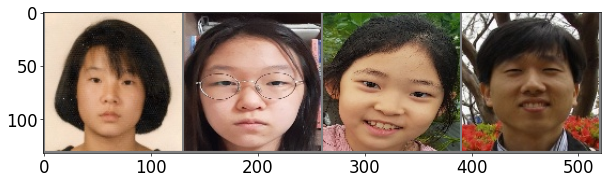

['13-19 years old', '13-19 years old', '7-12 years old', '20-30 years old']


In [45]:
plt.rcParams['figure.figsize'] = [12,8]
plt.rcParams['figure.dpi'] = 60
plt.rcParams.update({'font.size' : 20})

def imshow(input):
    #torch.tensor => numpy
    # channel X height X width -> height X width X channel
    input = input.numpy().transpose((1,2,0))
    #undo image normalization
    mean = np.array([0.5,0.5,0.5])
    std = np.array([0.5,0.5,0.5])
    input = std * input + mean
    # replace image number between 0 and 1 
    input = np.clip(input,0,1)
    #display images
    plt.imshow(input)
    plt.show()

    
#load a batch of train image
iterator = iter(train_dataloader)

#visualize a batch of train image
imgs, labels = next(iterator)
out = torchvision.utils.make_grid(imgs[:4])
imshow(out)
print([label_to_age[labels[i].item()] for i in range(4)])


In [40]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [32]:
learning_rate = 0.01
log_step = 20

model = models.resnet50(pretrained = True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 8) #transfer learning
model = model.cuda()

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr = learning_rate, momentum = 0.9)

RuntimeError: CUDA error: out of memory

In [28]:
import time

def train():
    start_time = time.time()
    print(f'[Epoch : {epoch+1} - Training]')
    model.train()
    total = 0
    running_loss = 0.0
    running_corrects = 0
    
    for i, batch in enumerate(train_dataloader):
        imgs, labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()
        
        outputs = model(imgs)
        optimizer.zero_grad()
        _, preds = torch.max(outputs,1)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
        
        if i% log_step == log_step -1:
            print(f'[Batch : {i+1}] running train loss : {running_loss / total}. running train accuracy : {running_corrects / total}')
    
    print(f"trian loss : {running_loss / total}, accuracy : {running_corrects / total}")
    print("elapsed time : ",time.time() - start_time)
    return running_loss / total, (running_corrects/total).item()


def validate():
    start_time = time.time()
    print(f"[Epoch : {epoch +1}- Validation]")
    model.eval()
    total = 0
    running_loss = 0.
    running_corrects = 0
    
    for i, batch in enumerate(val_dataloader):
        imgs,labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()
        
        with torch.no_grad():
            outputs = model(imgs)
            _,preds = torch.max(outputs,1)
            loss = criterion(outputs, labels)
            
        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
        
        if(i==0) or (i %log_step == log_step -1):
            print(f"[Batch : {i+1}] running val loss : {running_loss/total}. running val accuracy : {running_corrects /total}")
    
    print(f"val loss : {running_loss /total}, accuracy : {running_corrects/total}")
    print("elapesd time : ",time.time()-start_time)
    return running_loss /total, (running_corrects /total).item()

def test():
    start_time = time.time()
    print(f"[Test]")
    model.eval()
    total = 0
    running_loss = 0.
    running_corrects = 0
    
    for i, batch in enumerate(val_dataloader):
        imgs,labels = batch
        imgs, labels = imgs.cuda(), labels.cuda()
        
        with torch.no_grad():
            outputs = model(imgs)
            _,preds = torch.max(outputs,1)
            loss = criterion(outputs, labels)
            
        total += labels.shape[0]
        running_loss += loss.item()
        running_corrects += torch.sum(preds == labels.data)
        
        if(i==0) or (i %log_step == log_step -1):
            print(f"[Batch : {i+1}] running test loss : {running_loss/total}. running test accuracy : {running_corrects /total}")
    
    print(f"test loss : {running_loss /total}, accuracy : {running_corrects/total}")
    print("elapesd time : ",time.time()-start_time)
    return running_loss /total, (running_corrects /total).item()
    

In [29]:
import time

def adjust_learning_rate(optimizer, epoch):
    lr = learning_rate
    if epoch >=3:
        lr /= 10
    
    if epoch >=7:
        lr /= 10
    for param_group in optimizer.param_groups:
        param_group['lr'] = lr

In [30]:
num_epochs = 20
best_val_acc = 0
best_epoch = 0

history = []
accuracy = []

for epoch in range(num_epochs):
    adjust_learning_rate(optimizer,epoch)
    train_loss,train_acc = train()
    val_loss, val_acc = validate()
    history.append((train_loss,val_loss))
    accuracy.append((train_acc,val_acc))
    
    if val_acc > best_val_acc:
        print("[info] best validation accuracy!")
        best_val_acc = val_acc
        best_epoch = epoch
        #torch.save(model.state_dict(), f'best_checkpoint_epoch_{epoch+1}.pth')

#torch.save(model.state_dict(),f'last_checkpoint_epoch_{epoch+1}.pth')

NameError: name 'optimizer' is not defined

In [ ]:
        
plt.plot([x[0] for x in accuracy], 'b', label = 'train')
plt.plot([x[1] for x in accuracy], 'r--', label = 'validation')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

test_loss, test_accuracy = test()
print(f"Test loss : {test_loss:.8f}")
print(f"Test accuracy : {test_accuracy*100.:.2f}%")

In [ ]:
model = models.resnet50(pretrained = True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 8)
model = model.cuda()
model_path = 'bset_checkpoint_epoch_9.pth'
model.load_state_dict(torch.load(model_path))

test_loss, test_accuracy = test()
print(f"Test loss : {test_loss:.8f}")
print(f"Test accuracy : {test_accuracy * 100.:.2f}%")
